# 개폐 

- 팽창 및 침식과 밀접한 관련이 있는 또 다른 연산자는 열림이라고 합니다.
실제로 침식과 확장으로 구성된 작업입니다.

- cv2.morphologyEx() 라는 함수를 사용합니다. 이 함수는 여러 작업에 사용 할 수 있으므로 사용하려는
작업을 지정하는 매개 변수를 추가해야 합니다. 즉 팽창 먼저 적용 후 침식을 적용합니다.

In [1]:
'''
opening : erosion -> dilation (to delete dot noise)
'''
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:

img = cv2.imread('Billiards.png', cv2.IMREAD_GRAYSCALE)

_, mask = cv2.threshold(img, 230, 255, cv2.THRESH_BINARY_INV)

In [3]:
# datatype : int, float
kernel = np.ones((3, 3), np.uint8)

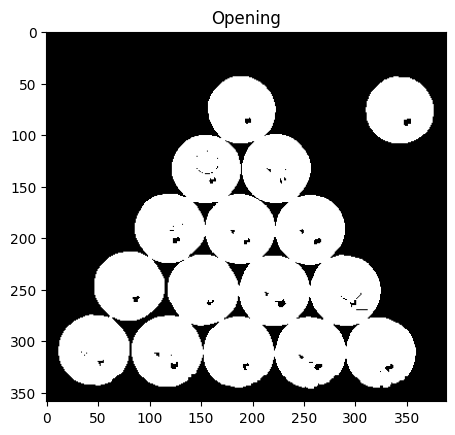

In [7]:
erosion = cv2.erode(mask, kernel, iterations=1)
opening = cv2.dilate(erosion, kernel, iterations=1)
plt.imshow(opening, 'gray')
plt.title('Opening')
plt.savefig('11.Opening.png')
plt.show()

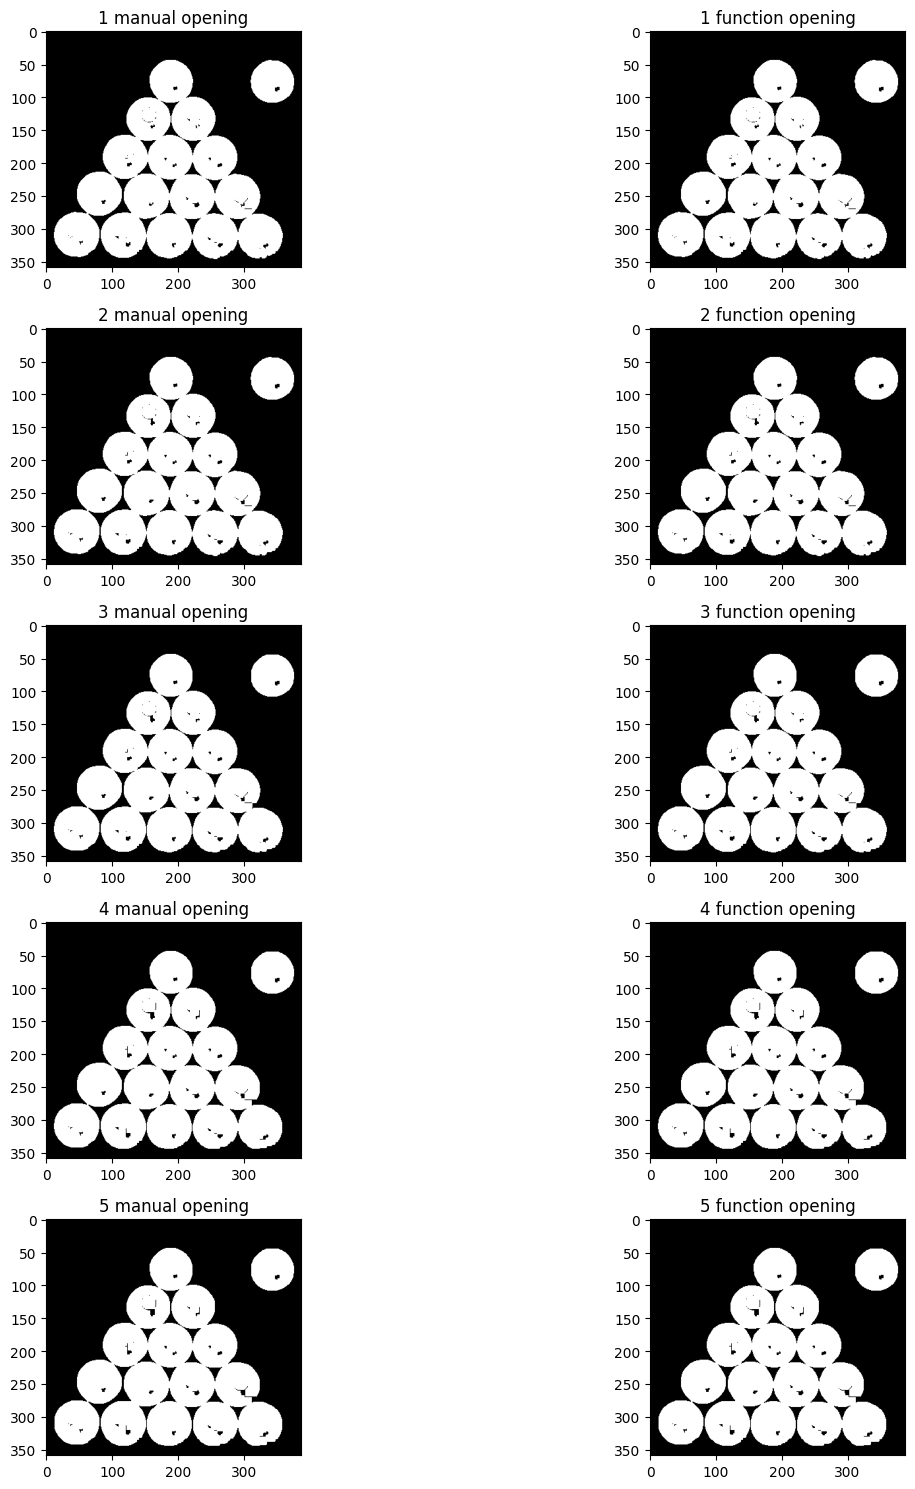

In [8]:
N = 5
idx = 1
plt.figure(figsize=(15, 15))
for i in range(1, N + 1):
    erosion = cv2.erode(mask, kernel, iterations=i)
    opening = cv2.dilate(erosion, kernel, iterations=i)
    f_opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=i)

    plt.subplot(N, 2, idx)
    idx += 1
    plt.imshow(opening, 'gray')
    plt.title(f'{i} manual opening')

    plt.subplot(N, 2, idx)
    plt.imshow(f_opening, 'gray')
    plt.title(f'{i} function opening')
    idx += 1
plt.tight_layout()
plt.savefig('11.Opening Comparison.png')
plt.show()
